## Simple Linear Regression

Import packages


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
#Downloading Dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-04-17 21:04:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2023-04-17 21:04:45 (1.39 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
#Copy dataset in a dataframe
df = pd.read_csv("FuelConsumption.csv")
df.head(10)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#select few features 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Plot pairs, to see how linear their relationship is


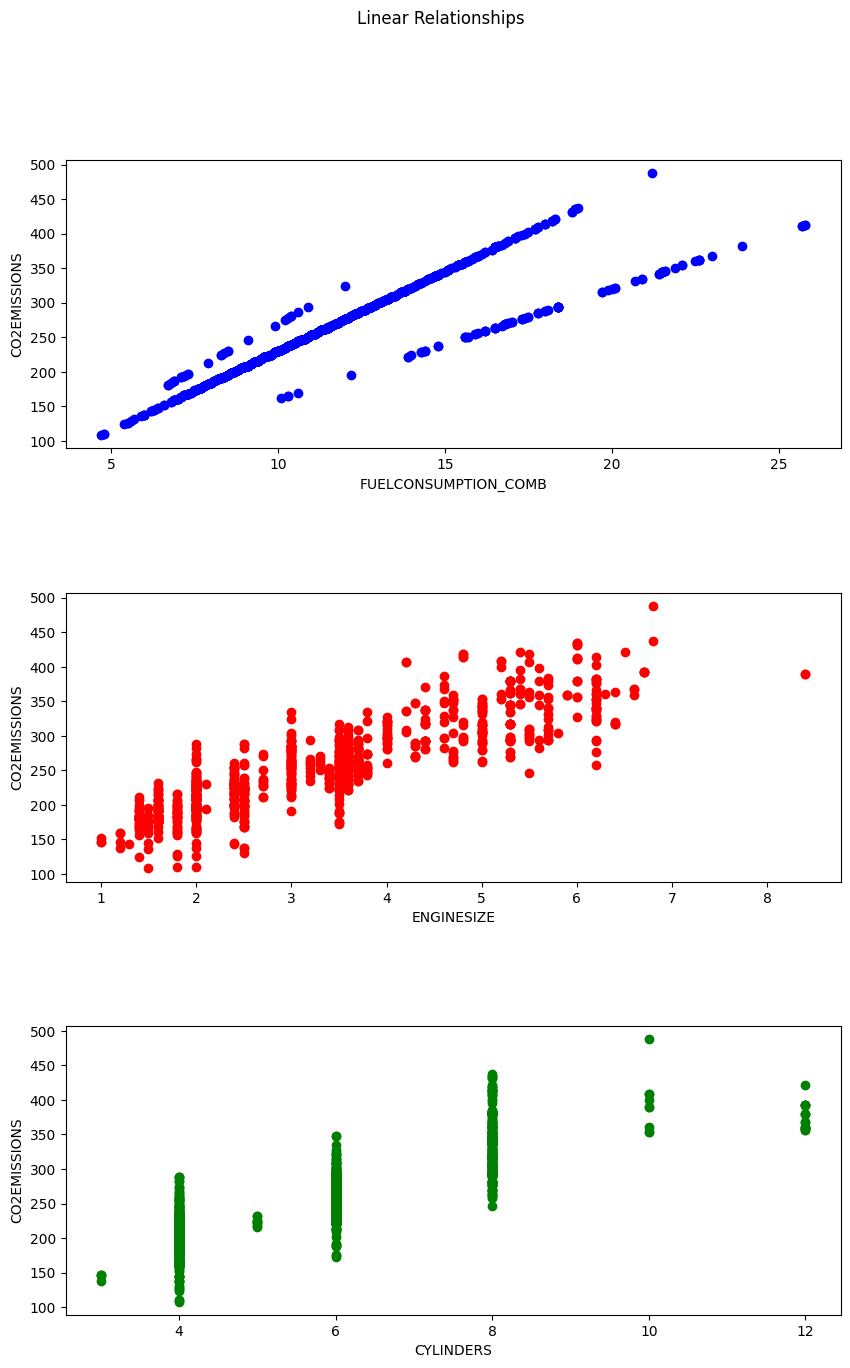

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,15))
fig.suptitle('Linear Relationships')

ax1.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
ax1.set_xlabel("FUELCONSUMPTION_COMB")
ax1.set_ylabel("CO2EMISSIONS")

ax2.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
ax2.set_xlabel("ENGINESIZE")
ax2.set_ylabel("CO2EMISSIONS")

ax3.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
ax3.set_xlabel("CYLINDERS")
ax3.set_ylabel("CO2EMISSIONS")

plt.subplots_adjust(
                    wspace=0.5,
                    hspace=0.5)

plt.show()

**It can be conluded from figures that CO2EMISSIONS and ENGINESIZE has better linear relationship. So we wil continue with these two as features **

In [47]:
#Split tarin and test
msk = np.random.rand(len(df)) < 0.8 # creating mask
print(msk)
print(~msk)
train = cdf[msk]
test = cdf[~msk]

[ True False  True ...  True False  True]
[False  True False ... False  True False]


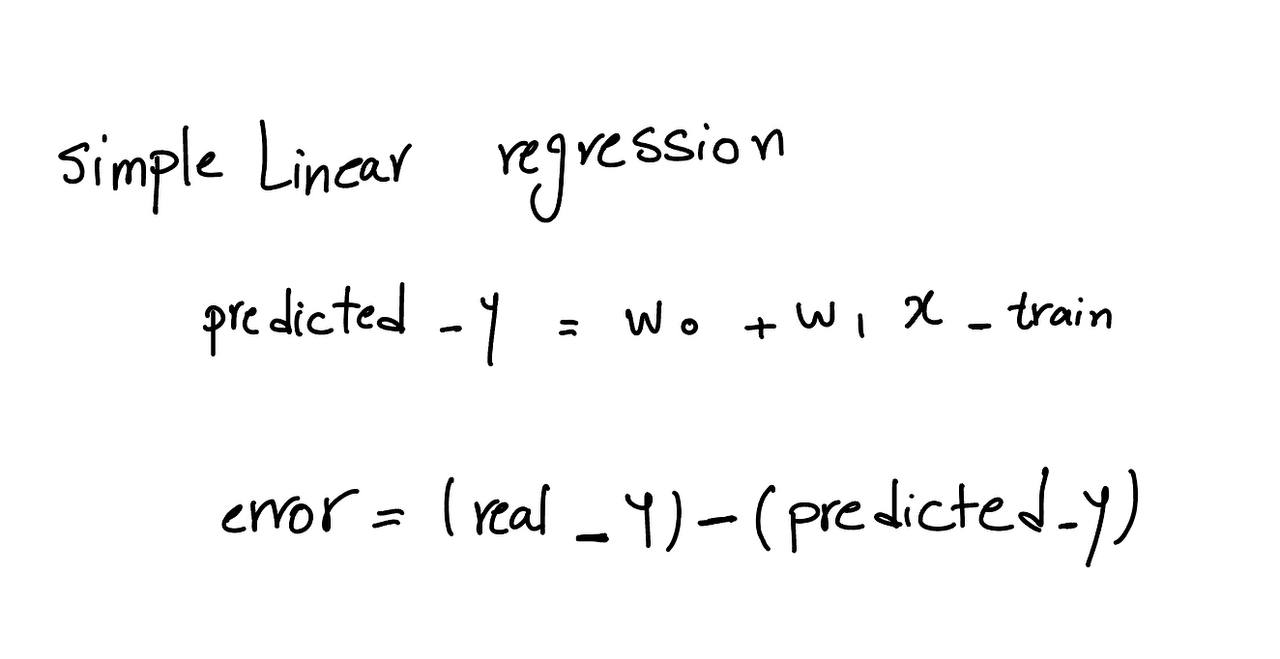

In [55]:
#predict CO2EMISSIONS(y) from ENGINESIZE(x)
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_train, y_train)
# The coefficients
print ('W1: ', regr.coef_)
print ('W0: ',regr.intercept_)

W1:  [[39.11686369]]
W0:  [125.34552918]


Text(0, 0.5, 'CO2EMISSIONS')

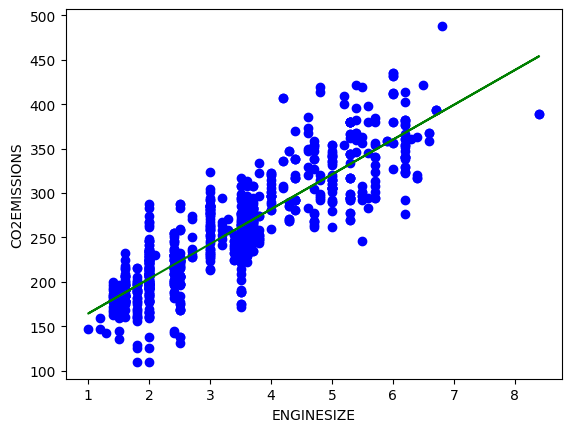

In [60]:
#Plot outputs
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-g')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

In [61]:
#Evaluation

from sklearn.metrics import r2_score
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
Predicted_y = regr.predict(x_test)
abs_error = Predicted_y - y_test
print("Mean absolute error: %.3f" % np.mean(np.absolute(abs_error)))
print("MSE: %.3f" % np.mean((abs_error) ** 2))
print("R2-score: %.3f" % r2_score(Predicted_y , y_test) )  #The closer it is to 1, the better the performance of the model

Mean absolute error: 21.836
MSE: 838.774
R2-score: 0.728


Text(0, 0.5, 'CO2EMISSIONS')

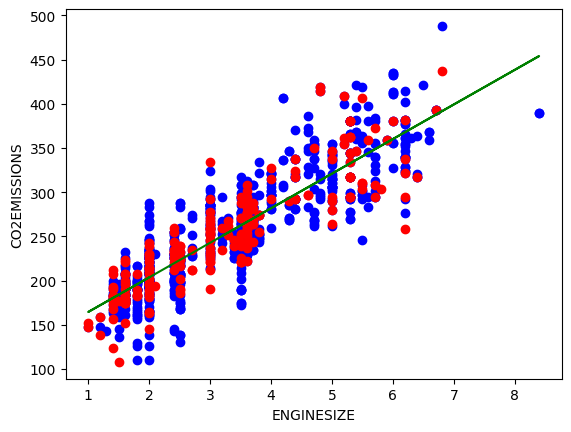

In [64]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-g')
plt.scatter(x_test, y_test,  color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")